In [8]:
from plantseg.io import smart_load_with_vs, create_h5
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def _relabel(input):
    unique_labels, relabelled_flat_array = np.unique(input, return_inverse=True)
    return unique_labels, relabelled_flat_array.reshape(input.shape)

In [10]:
PATH_DIR = Path("/g/kreshuk/yu/datasets/FOR2581/diploid/omni/")
PATH_OUT = Path("/g/kreshuk/yu/repositories/go-nuclear/stardist/tests/data/")
list_files = list(Path(PATH_DIR).glob("*.h5"))
pprint(list_files)

[PosixPath('/g/kreshuk/yu/datasets/FOR2581/diploid/omni/1135.h5'),
 PosixPath('/g/kreshuk/yu/datasets/FOR2581/diploid/omni/1136.h5'),
 PosixPath('/g/kreshuk/yu/datasets/FOR2581/diploid/omni/1137.h5'),
 PosixPath('/g/kreshuk/yu/datasets/FOR2581/diploid/omni/1139.h5'),
 PosixPath('/g/kreshuk/yu/datasets/FOR2581/diploid/omni/1170.h5')]


In [11]:
for file in list_files:
    raw, vs_raw = smart_load_with_vs(file, 'raw/noisy')
    lab, vs_raw = smart_load_with_vs(file, 'label/gold')
    print(raw.shape, lab.shape)

(263, 1024, 1024) (263, 1024, 1024)
(268, 1120, 1120) (268, 1120, 1120)
(262, 1080, 1080) (262, 1080, 1080)
(280, 1120, 1120) (280, 1120, 1120)
(241, 753, 1672) (241, 753, 1672)


In [12]:
for file in list_files:
    raw, vs_raw = smart_load_with_vs(file, 'raw/noisy')
    lab, vs_lab = smart_load_with_vs(file, 'label/gold')

    # Create a new HDF5 file with a small middle crop
    raw_cropped = raw[100:200, 500:600, 500:600]
    _, lab_cropped = _relabel(lab[100:200, 500:600, 500:600])
    create_h5(
        path = PATH_OUT / (file.stem + "_mini.h5"),
        stack = raw_cropped.astype(np.uint8),
        key = 'raw',
        voxel_size = vs_raw
    )
    create_h5(
        path = PATH_OUT / (file.stem + "_mini.h5"),
        stack = lab_cropped.astype(np.uint8),
        key = 'label',
        voxel_size = vs_lab
    )

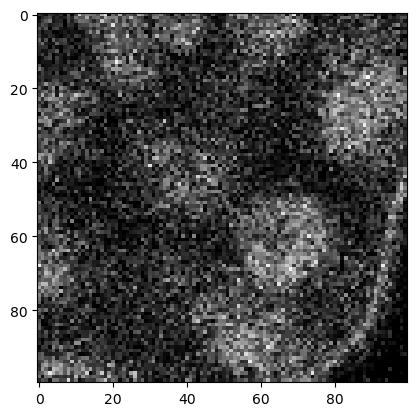

In [13]:
plt.imshow(raw_cropped[0, :, :], cmap='gray')

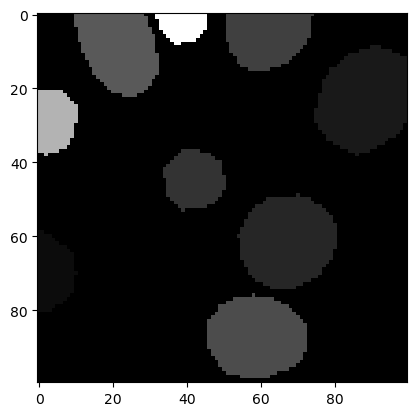

In [14]:
plt.imshow(lab_cropped[0, :, :], cmap='gray')